# Exercise: 
### Build decision tree model to predict survival based on certain parameters

In this file using following columns build a model to predict if person would survive or not,
- Pclass
- Sex
- Age
- Fare
 
Calculate score of your model

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df[['Survived','Pclass','Sex','Age','Fare']]
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### differentiating the input and target

In [4]:
inputs = df.drop('Survived', axis = 'columns')
target = df['Survived']

### converting the word male and female to integer 0 and 1 

In [5]:
inputs['Sex'] = inputs['Sex'].map({'male': 1, 'female': 2})

In [6]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

### now the age column has NaN so we need to fill it using mean

In [7]:
inputs['Age'] = inputs['Age'].fillna(inputs['Age'].mean())

In [8]:
inputs.head() # X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [9]:
target.head() # y

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## now splitting the datasets 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train,y_test = train_test_split(inputs,target, test_size=0.2)

### now training our model using decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### now lets predict as our model is ready 

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [20]:
model.score(X_test,y_test)

0.7821229050279329

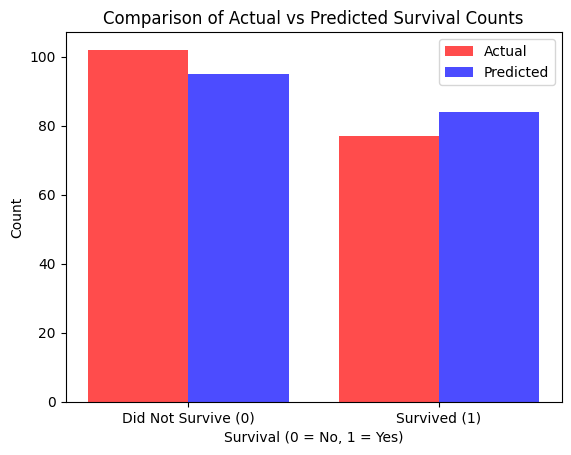

In [26]:
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Bar chart
bar_width = 0.4
index = np.arange(len(actual_counts))

plt.bar(index, actual_counts, bar_width, label="Actual", color='red', alpha=0.7)
plt.bar(index + bar_width, predicted_counts, bar_width, label="Predicted", color='blue', alpha=0.7)

plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(index + bar_width / 2, ['Did Not Survive (0)', 'Survived (1)'])
plt.legend()
plt.title("Comparison of Actual vs Predicted Survival Counts")
plt.show()